IMDB 데이터셋 로드하기

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

정수 시퀸스를 이진 행렬로 인코딩하기

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
#output = relu(dot(W, input) + b)

모델 정의하기

In [10]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


모델 컴파일하기

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

옵티마이저 설정하기

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

손실과 측정을 함수 객체로 지정하기

In [ ]:
from keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

검증 세트 준비하기

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델 훈련하기

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 395us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 123us/step - 

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

훈련과 검증 손실 그리기

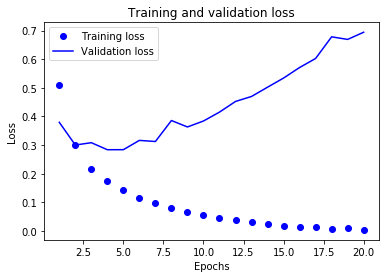

In [18]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

훈련과 검증 정확도 그리기

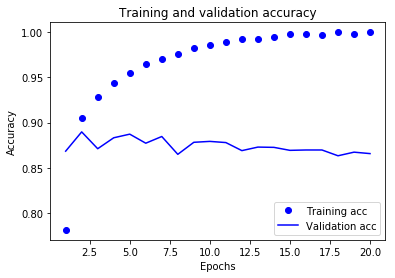

In [19]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

모델을 처음부터 다시 훈련하기

In [20]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 122us/step


In [21]:
results

[0.3231440426158905, 0.87348]

In [22]:
model.predict(x_test)

array([[0.1402615 ],
       [0.9997028 ],
       [0.29552516],
       ...,
       [0.07234982],
       [0.04342842],
       [0.48153397]], dtype=float32)

1개의 은닉층 테스트

In [23]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.4477 - acc: 0.8325
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2797 - acc: 0.9077
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2214 - acc: 0.9244
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [24]:
results

[0.2789423728942871, 0.8888]

3개의 은닉층 테스트

In [25]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.4602 - acc: 0.8176
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2505 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2010 - acc: 0.9260
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [26]:
results

[0.3063558402490616, 0.88016]

3개 은닉층 + 유닛 증가

In [27]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.4386 - acc: 0.8087
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2432 - acc: 0.9084
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1839 - acc: 0.9327
Epoch 4/4
25000/25000 [==============================] - 3s 116us/step


In [28]:
results

[0.3377230154514313, 0.87672]

3개 은닉층 + 유닛 증가

In [29]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.4221 - acc: 0.8108
Epoch 2/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.2297 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.1841 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 112us/step


In [30]:
results

[0.4243271171236038, 0.84944]

4개 은닉층 + 유닛 수 다 다르게

In [31]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4383 - acc: 0.8052
Epoch 2/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.2523 - acc: 0.9031
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1874 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 3s 116us/step


In [32]:
results

[0.3450305989265442, 0.87308]

loss를 mse로 변경

In [33]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.1418 - acc: 0.8076
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.0729 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.0551 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step


In [34]:
results

[0.0904668045437336, 0.87912]

In [35]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.1311 - acc: 0.8225
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.0655 - acc: 0.9158
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.0509 - acc: 0.9348
Epoch 4/4
25000/25000 [==============================] - 3s 114us/step


In [36]:
results

[0.09722661297380925, 0.8726]

In [37]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1270 - acc: 0.8171
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.0663 - acc: 0.9116
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.0515 - acc: 0.9332
Epoch 4/4
25000/25000 [==============================] - 3s 113us/step


In [38]:
results

[0.09701340472504497, 0.87428]

In [39]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.1456 - acc: 0.8111
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.0733 - acc: 0.9120
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.0542 - acc: 0.9330
Epoch 4/4
25000/25000 [==============================] - 3s 115us/step


In [40]:
results

[0.09185329184770584, 0.87756]